In [1]:
import os
import subprocess
import sys
# import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from PIL import Image 
import pandas as pd
import sqlite3
from IPython.display import IFrame


# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
print(gisbase)

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs

# Import GRASS Jupyter
import grass.jupyter as gj

/usr/local/grass83


In [2]:
gisdb = os.path.join(os.getenv('HOME'), 'grassdata')
site = 'clay-center'
gj.init(gisdb, site, 'sensitivity')

In [3]:
gs.run_command('g.region', raster='elevation', flags='pa')

projection: 1 (UTM)
zone:       14
datum:      wgs84
ellipsoid:  wgs84
north:      4363578.81553571
south:      4362417.81553571
west:       666092.80807312
east:       667469.80807312
nsres:      3
ewres:      3
rows:       387
cols:       459
cells:      177633


In [6]:
!g.list type=raster

depth_1_05_0.05
depth_1_05_0.10
depth_1_05_0.15
depth_1_05_0.20
depth_1_05_0.25
depth_1_05_0.30
depth_1_05_1.05
depth_1_05_1.10
depth_1_05_1.15
depth_1_05_1.20
depth_1_05_1.25
depth_1_05_1.30
depth_1_05_2.05
depth_1_05_2.10
depth_1_05_2.15
depth_1_05_2.20
depth_1_05_2.25
depth_1_05_2.30
depth_1_05_3.05
depth_1_05_3.10
depth_1_05_3.15
depth_1_05_3.20
depth_1_05_3.25
depth_1_05_3.30
depth_1_05_4.05
depth_1_05_4.10
depth_1_05_4.15
depth_1_05_4.20
depth_1_05_4.25
depth_1_05_4.30
depth_1_05_5.05
depth_1_05_5.10
depth_1_05_5.15
depth_1_05_5.20
depth_1_05_5.25
depth_1_05_5.30
depth_1_05_6.05
depth_1_05_6.10
depth_1_05_6.15
depth_1_05_6.20
depth_1_05_6.25
depth_1_05_6.30
depth_1_05_7.05
depth_1_05_7.10
depth_1_05_7.15
depth_1_05_7.20
depth_1_05_7.25
depth_1_05_7.30
depth_1_05_8.05
depth_1_05_8.10
depth_1_05_8.15
depth_1_05_8.20
depth_1_05_8.25
depth_1_05_8.30
depth_1_05_9.05
depth_1_05_9.10
depth_1_05_9.15
depth_1_05_9.20
depth_1_05_9.25
depth_1_05_9.30
depth_1_1_0.05
depth_1_1_0.10
depth_1_1_

In [ ]:
res = 1
scalar_str = "05"
i = 0
vs_map = gj.InteractiveMap()
vs_map.add_raster("elevation", opacity=0.8)
vs_map.add_raster(f"depth_{res}_{scalar_str}_{i}.05", opacity=0.5)
vs_map.add_layer_control()
# vs_map.add_query_button()
vs_map.show()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [31]:
!g.list type=all pattern="depth_*_*_*_stats_*"

depth_sum_1_05_0_stats_average
depth_sum_1_05_0_stats_max_raster
depth_sum_1_05_0_stats_maximum
depth_sum_1_05_0_stats_median
depth_sum_1_05_0_stats_min_raster
depth_sum_1_05_0_stats_minimum
depth_sum_1_05_0_stats_range
depth_sum_1_05_0_stats_stddev
depth_sum_1_05_1_stats_average
depth_sum_1_05_1_stats_max_raster
depth_sum_1_05_1_stats_maximum
depth_sum_1_05_1_stats_median
depth_sum_1_05_1_stats_min_raster
depth_sum_1_05_1_stats_minimum
depth_sum_1_05_1_stats_range
depth_sum_1_05_1_stats_stddev
depth_sum_1_05_2_stats_average
depth_sum_1_05_2_stats_max_raster
depth_sum_1_05_2_stats_maximum
depth_sum_1_05_2_stats_median
depth_sum_1_05_2_stats_min_raster
depth_sum_1_05_2_stats_minimum
depth_sum_1_05_2_stats_range
depth_sum_1_05_2_stats_stddev
depth_sum_1_05_3_stats_average
depth_sum_1_05_3_stats_max_raster
depth_sum_1_05_3_stats_maximum
depth_sum_1_05_3_stats_median
depth_sum_1_05_3_stats_min_raster
depth_sum_1_05_3_stats_minimum
depth_sum_1_05_3_stats_range
depth_sum_1_05_3_stats_stddev


In [18]:
gs.run_command(
    "t.rast.colors",
    input=f"depth_sum_{res}_{scalar_str}_{i}",
    raster=f"depth_{res}_{scalar_str}_{i}.05"
)

In [13]:
ts_map = gj.TimeSeriesMap()
ts_map.add_raster_series(f"depth_sum_{res}_{scalar_str}_{i}")
# ts_map.d_legend(legend_name="Depth (m)")
ts_map.show()

In [ ]:
series = gj.SeriesMap(height = 500)
series.add_rasters(['depth_sum_1_05_0_stats_max_raster',
 'depth_sum_1_05_1_stats_max_raster',
 'depth_sum_1_05_2_stats_max_raster',
 'depth_sum_1_05_3_stats_max_raster',
 'depth_sum_1_05_4_stats_max_raster',
 'depth_sum_1_05_5_stats_max_raster',
 'depth_sum_1_05_6_stats_max_raster',
 'depth_sum_1_05_7_stats_max_raster',
 'depth_sum_1_05_8_stats_max_raster',
 'depth_sum_1_05_9_stats_max_raster',
 'depth_sum_1_1_0_stats_max_raster',
 'depth_sum_1_1_1_stats_max_raster',
 'depth_sum_1_1_2_stats_max_raster',
 'depth_sum_1_1_3_stats_max_raster',
 'depth_sum_1_1_4_stats_max_raster',
 'depth_sum_1_1_5_stats_max_raster',
 'depth_sum_1_1_6_stats_max_raster',
 'depth_sum_1_1_7_stats_max_raster',
 'depth_sum_1_1_8_stats_max_raster'])
# series.add_vectors(["streams", "streets", "viewpoints"])
series.d_barscale()
series.show()  # Create Slider
# series.save("image.gif")

In [57]:
depth_list_05 = gs.read_command(
        "g.list", type="raster", pattern="depth_sum_1_1_*_stats_average", separator="comma"  # noqa: E501
).strip()

# print(depth_list_05)

gs.run_command(
    "r.colors",
    map=depth_list_05,
    color="inferno",
    # raster=f"depth_{res}_{scalar_str}_{i}.05",
    flags="e"
)

series = gj.SeriesMap(height = 500)
series.add_rasters(depth_list_05.split(","))
# series.add_vectors(["streams", "streets", "viewpoints"])
series.d_barscale()
series.show()  # Create Slider
series.save("output/depth_sum_1_1_*_stats_average.gif")

'output/depth_sum_1_1_*_stats_average.gif'

In [72]:
def univar_stats_df(raster_list):
    stats_list = []
    for raster in raster_list.split(","):
        stats = gs.parse_command("r.univar", map=raster, format="json", flags="e")[0]
        stats["resolution"] = raster.split("_")[2]
        stats["scalar"] = raster.split("_")[3]
        stats["random_seed"] = raster.split("_")[4]
        stats["stat_type"] = raster.split("_")[6]
        if len(raster.split("_")) > 7:
            stats["stat_type"] = f"{raster.split('_')[6]}_{raster.split('_')[7]}"
        
        stats_list.append(stats)
    
    return pd.DataFrame(stats_list)

raster_depth_list = gs.read_command(
        "g.list", type="raster", pattern="depth_sum_*_*_*_stats_*", separator="comma"  # noqa: E501
).strip()

depth_stats_df = univar_stats_df(raster_depth_list)
depth_stats_df.head()
    


,n,null_cells,cells,min,max,range,mean,mean_of_abs,stddev,variance,coeff_var,sum,first_quartile,median,third_quartile,percentiles,resolution,scalar,random_seed,stat_type
0,168556,9077,177633,0.000255,0.823115,0.822860,0.016237,0.016237,0.040509,0.001641,249.487276,2736.809138,0.003971,0.006527,0.010662,"[{'percentile': 90, 'value': 0.023446571081876...",1,05,0,average
1,168556,9077,177633,0.000000,5.000000,5.000000,1.311712,1.311712,2.000871,4.003484,152.538839,221097.000000,0.000000,0.000000,2.000000,"[{'percentile': 90, 'value': 5}]",1,05,0,max_raster
2,168556,9077,177633,0.000255,1.331735,1.331480,0.021149,0.021149,0.058938,0.003474,278.682754,3564.745569,0.004069,0.006650,0.011163,"[{'percentile': 90, 'value': 0.028481796383857...",1,05,0,maximum
3,168556,9077,177633,0.000255,0.787995,0.787739,0.016564,0.016564,0.043571,0.001898,263.047169,2791.931884,0.003971,0.006474,0.010585,"[{'percentile': 90, 'value': 0.0230106133967638}]",1,05,0,median
4,168556,9077,177633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,"[{'percentile': 90, 'value': 0}]",1,05,0,min_raster


<Axes: xlabel='scalar', ylabel='random_seed'>

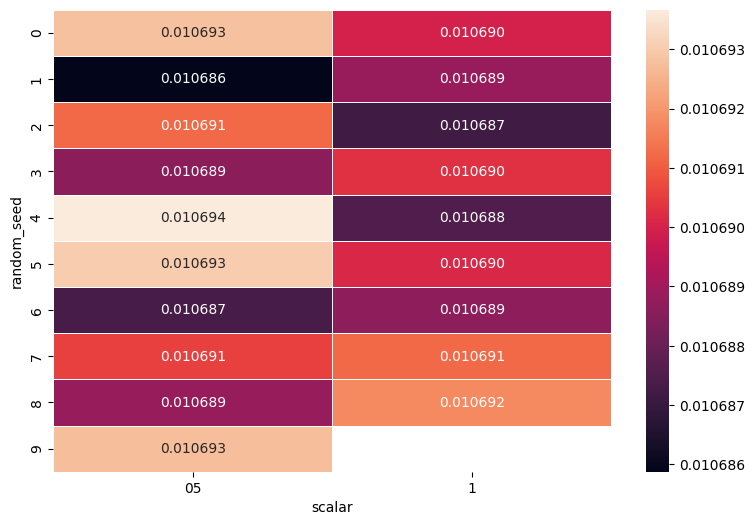

In [89]:
import seaborn as sns

f, ax = plt.subplots(figsize=(9, 6))
mean_heatmap = (
    # depth_stats_df[depth_stats_df["stat_type"] == "average"].groupby(by="resolution").aggregate("mean").pivot(index="resolution", columns="scalar", values="mean")
    depth_stats_df[depth_stats_df["stat_type"] == "range"].pivot(index="random_seed", columns="scalar", values="mean")
)
sns.heatmap(mean_heatmap, annot=True, fmt="f", linewidths=.5, ax=ax)

In [151]:
filtered_df = depth_stats_df[(depth_stats_df["stat_type"] == "median") # & 
                            #  (depth_stats_df["resolution"] == "1")
                            #  (depth_stats_df["scalar"] == "05")
                            ]

filtered_df.head()


,n,null_cells,cells,min,max,range,mean,mean_of_abs,stddev,variance,coeff_var,sum,first_quartile,median,third_quartile,percentiles,resolution,scalar,random_seed,stat_type
3,168556,9077,177633,0.000255,0.787995,0.787739,0.016564,0.016564,0.043571,0.001898,263.047169,2791.931884,0.003971,0.006474,0.010585,"[{'percentile': 90, 'value': 0.0230106133967638}]",1,05,0,median
11,168556,9077,177633,0.000255,0.787515,0.787260,0.016556,0.016556,0.043573,0.001899,263.185679,2790.580743,0.003922,0.006438,0.010585,"[{'percentile': 90, 'value': 0.0230293869972229}]",1,05,1,median
19,168556,9077,177633,0.000255,0.786284,0.786028,0.016559,0.016559,0.043570,0.001898,263.116877,2791.177449,0.003946,0.006474,0.010585,"[{'percentile': 90, 'value': 0.023047395981848...",1,05,2,median
27,168556,9077,177633,0.000255,0.789276,0.789020,0.016559,0.016559,0.043579,0.001899,263.167289,2791.165553,0.003971,0.006474,0.010585,"[{'percentile': 90, 'value': 0.023037104867398...",1,05,3,median
35,168556,9077,177633,0.000255,0.787164,0.786909,0.016561,0.016561,0.043571,0.001898,263.102376,2791.396701,0.003971,0.006474,0.010585,"[{'percentile': 90, 'value': 0.023071398958563...",1,05,4,median


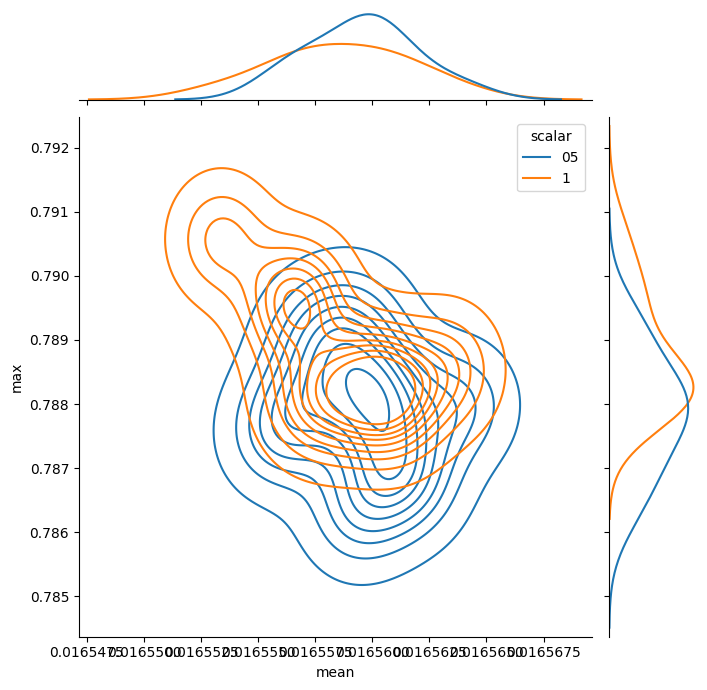

In [154]:
sns.jointplot(x="mean", y="max", data=filtered_df,
                  kind="kde", 
                  hue="scalar",
                  # truncate=False,
                #   xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

<Axes: xlabel='resolution', ylabel='mean'>

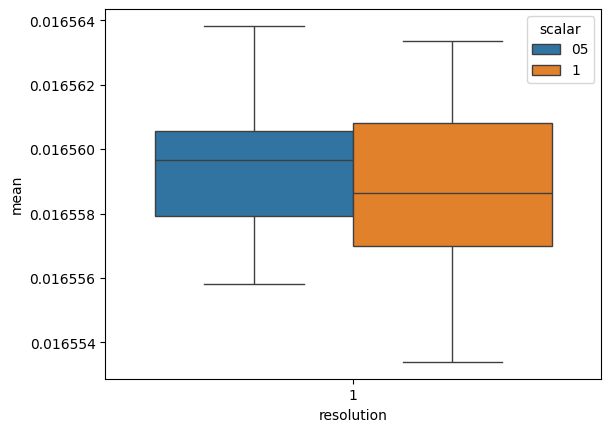

In [160]:
sns.boxplot(x="resolution", y="mean",
            hue="scalar",
            data=filtered_df)

<Axes: xlabel='resolution', ylabel='mean'>

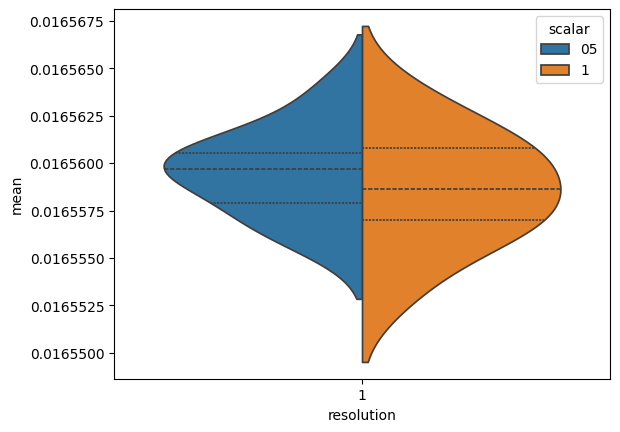

In [153]:
sns.violinplot(data=filtered_df, x="resolution", y="mean", hue="scalar", split=True, inner="quart")


In [104]:
group_res_scalar_df = depth_stats_df.groupby(["resolution", "scalar"], as_index=True)
group_res_scalar_df

In [5]:
gisdb = os.path.join(os.getenv('HOME'), 'grassdata')
site = 'nc_spm_08_grass7'
gj.init(gisdb, site, 'PERMANENT')

gs.run_command('g.region', raster='landuse96_28m', res=30, flags='pa')
# print("Read")
# report_data = gs.read_command('r.report', map='towns,landuse96_28m', unit="c,h,p", format="json")
# pprint(report_data)

# print("Run")
# # gs.run_command('g.region', raster='landuse96_28m', res=30, flags='pa')
# report_data = gs.run_command('r.report', map='towns,landuse96_28m', unit="c,h,p", format="json")
# pprint(report_data)

print("Parse")
report_data = gs.parse_command('r.report', map='towns,landuse96_28m', unit="c,h,p", format="json")



projection: 99 (Lambert Conformal Conic)
zone:       0
datum:      nad83
ellipsoid:  a=6378137 es=0.006694380022900787
north:      228540
south:      215010
west:       629970
east:       645000
nsres:      30
ewres:      30
rows:       451
cols:       501
cells:      225951
Parse
{'categories': [{'categories': [{'category': 0,
                                 'label': 'not classified',
                                 'units': [{'unit': 'cell counts', 'value': 1},
                                           {'unit': 'hectares',
                                            'value': 0.09000000000000001},
                                           {'unit': '% cover',
                                            'value': 0.003448156960104824}]},
                                {'category': 1,
                                 'label': 'High Intensity Developed',
                                 'units': [{'unit': 'cell counts',
                                            'value': 2434},
     

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.json_normalize(report_data["categories"])
df.head()


,category,label,units,categories
0,1,CARY,"[{'unit': 'cell counts', 'value': 29001}, {'un...","[{'category': 0, 'label': 'not classified', 'u..."
1,2,GARNER,"[{'unit': 'cell counts', 'value': 15680}, {'un...","[{'category': 1, 'label': 'High Intensity Deve..."
2,3,APEX,"[{'unit': 'cell counts', 'value': 2786}, {'uni...","[{'category': 2, 'label': 'Low Intensity Devel..."
3,4,RALEIGH-CITY,"[{'unit': 'cell counts', 'value': 17894}, {'un...","[{'category': 1, 'label': 'High Intensity Deve..."
4,5,RALEIGH-SOUTH,"[{'unit': 'cell counts', 'value': 136323}, {'u...","[{'category': 1, 'label': 'High Intensity Deve..."


In [68]:
#  Assuming 'df' has a 'town' column that you want to include in each row of the final DataFrame
df = pd.json_normalize(report_data["categories"])

units_dfs = []
for index, row in df.iterrows():
    # Normalize the 'units' column and include the 'town' label
    unit_df = pd.json_normalize(row['units'])
    unit_df['town'] = row['label']  # Add the town label to each normalized DataFrame
    units_dfs.append(unit_df)

# Concatenate all the DataFrames in units_dfs
units_df = pd.concat(units_dfs, ignore_index=True)

# Drop the 'units' and 'categories' columns from the original DataFrame and reset index
df = df.drop(columns=['units', 'categories']).reset_index(drop=True)

# Since 'town' is already included in units_df, we don't need to explicitly add it again
final_df = pd.concat([df, units_df], axis=1)

final_df.head()

,category,label,unit,value,town
0,1.0,CARY,cell counts,29001.000000,CARY
1,2.0,GARNER,hectares,2610.090000,CARY
2,3.0,APEX,% cover,12.835084,CARY
3,4.0,RALEIGH-CITY,cell counts,15680.000000,GARNER
4,5.0,RALEIGH-SOUTH,hectares,1411.200000,GARNER


In [73]:

# Assuming 'report_data' is the dictionary containing your data

# Normalize the main categories DataFrame
categories_df = pd.json_normalize(report_data["categories"])

# Normalize and concatenate the units DataFrame while adding the 'town' label
units_df = pd.concat([
    pd.json_normalize(row['units']).assign(town=row['label'])
    for index, row in categories_df.iterrows()
], ignore_index=True)

# Drop the 'units' and 'categories' columns from the original categories DataFrame
categories_df = categories_df.drop(columns=['units', 'categories', 'category', 'label'])

# Concatenate the two DataFrames along the columns
final_df = pd.concat([categories_df, units_df], axis=1)

# Display the first few rows of the final DataFrame
final_df.head()


,unit,value,town
0,cell counts,29001.000000,CARY
1,hectares,2610.090000,CARY
2,% cover,12.835084,CARY
3,cell counts,15680.000000,GARNER
4,hectares,1411.200000,GARNER


In [72]:
final_df.head(20)

,category,label,unit,value,town
0,1.000000e+00,CARY,cell counts,29001.000000,CARY
1,2.000000e+00,GARNER,hectares,2610.090000,CARY
2,3.000000e+00,APEX,% cover,12.835084,CARY
3,4.000000e+00,RALEIGH-CITY,cell counts,15680.000000,GARNER
4,5.000000e+00,RALEIGH-SOUTH,hectares,1411.200000,GARNER
5,6.000000e+00,RALEIGH-WEST,% cover,6.939558,GARNER
6,-2.147484e+09,no data,cell counts,2786.000000,APEX
7,NaN,NaN,hectares,250.740000,APEX
8,NaN,NaN,% cover,1.233011,APEX
9,NaN,NaN,cell counts,17894.000000,RALEIGH-CITY


In [59]:
final_df[final_df["unit"] == "hectares"].head()

,category,label,unit,value
1,2.0,GARNER,hectares,2610.09
4,5.0,RALEIGH-SOUTH,hectares,1411.20
7,NaN,NaN,hectares,250.74
10,NaN,NaN,hectares,1610.46
13,NaN,NaN,hectares,12269.07


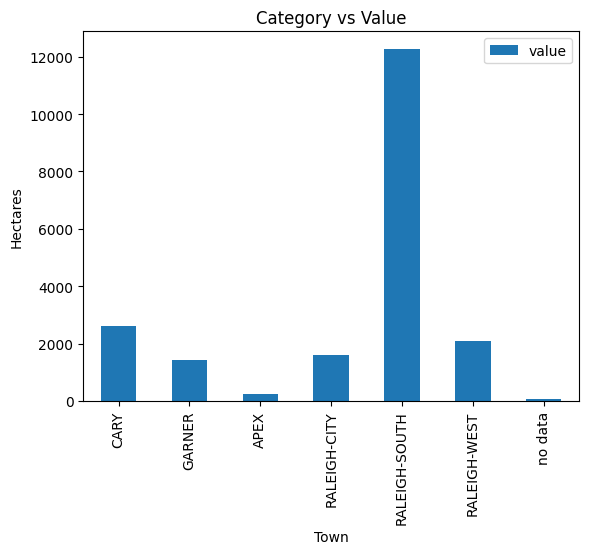

In [74]:
final_df[final_df["unit"] == "hectares"].plot(kind='bar', x='town', y='value', stacked=True)
plt.xlabel('Town')
plt.ylabel('Hectares')
plt.title('Category vs Value')
plt.show()

In [76]:
import pandas as pd

# Assuming 'report_data' is the dictionary containing your data

# Normalize the main categories DataFrame
categories_df = pd.json_normalize(report_data["categories"])

# Normalize and concatenate the units DataFrame while adding the 'town' label
units_df = pd.concat([
    pd.json_normalize(row['units']).assign(town=row['label'])
    for index, row in categories_df.iterrows()
], ignore_index=True)

# Normalize and concatenate the nested 'categories' DataFrame while adding the 'town' and 'main_category' label
landcover_dfs = []
for index, row in categories_df.iterrows():
    if row['categories'] is not None and len(row['categories']) > 0:
        landcover_df = pd.json_normalize(row['categories'])
        landcover_df['town'] = row['label']  # Add the town label
        landcover_df['main_category'] = row['label']  # Add the main category label
        landcover_dfs.append(landcover_df)

if landcover_dfs:  # Check if there are any landcover DataFrames to concatenate
    landcover_df = pd.concat(landcover_dfs, ignore_index=True)

    # Drop the 'units' and 'categories' columns from the original categories DataFrame
    categories_df = categories_df.drop(columns=['units', 'categories']).reset_index(drop=True)

    # Concatenate the main categories DataFrame with the units DataFrame
    final_df = pd.concat([categories_df, units_df], axis=1)

    # Merge the final_df with the landcover_df on the 'town' column
    final_df = final_df.merge(landcover_df, on='town', how='left', suffixes=('', '_landcover'))
else:
    # If there are no landcover DataFrames, simply concatenate the main categories DataFrame with the units DataFrame
    categories_df = categories_df.drop(columns=['units', 'categories']).reset_index(drop=True)
    final_df = pd.concat([categories_df, units_df], axis=1)

# Display the first few rows of the final DataFrame
final_df.head()


,category,label,unit,value,town,category_landcover,label_landcover,units,main_category
0,1.0,CARY,cell counts,29001.0,CARY,0,not classified,"[{'unit': 'cell counts', 'value': 1}, {'unit':...",CARY
1,1.0,CARY,cell counts,29001.0,CARY,1,High Intensity Developed,"[{'unit': 'cell counts', 'value': 2434}, {'uni...",CARY
2,1.0,CARY,cell counts,29001.0,CARY,2,Low Intensity Developed,"[{'unit': 'cell counts', 'value': 1318}, {'uni...",CARY
3,1.0,CARY,cell counts,29001.0,CARY,3,Cultivated,"[{'unit': 'cell counts', 'value': 85}, {'unit'...",CARY
4,1.0,CARY,cell counts,29001.0,CARY,4,Managed Herbaceous Cover,"[{'unit': 'cell counts', 'value': 1302}, {'uni...",CARY


In [131]:

def normalize_report(data):
   normalized_dfs = []
   didx = 0

   def normalize_units_and_categories(data, didx=0):
      # Normalize the main categories DataFrame
      if data.get("categories") is not None:
         print(f"Whammy: {didx}")
         categories_df = pd.json_normalize(data["categories"])
         print("Categories:")
         print(categories_df.head())

         units_df = None

         # Get category units
         if data.get("units") is not None:
            
            # units_df = pd.json_normalize(data["units"])
            # Normalize and concatenate the units DataFrame while adding the 'town' label
            units_df = pd.concat([
               pd.json_normalize(row['units']).assign(cat_label=row['label'])
               for index, row in data.iterrows()
            ], ignore_index=True)

            normalized_dfs.append(units_df)

         if categories_df is not None:
            didx += 1
            normalize_units_and_categories(categories_df, didx)
   

   maps = pd.json_normalize(data)
   cat_types = [m["layer"] for m in data["maps"]]
   print(f"Layers: {cat_types}")
   depth = len(cat_types)
   print(f"Depth: {depth}")
   normalize_units_and_categories(data, didx)
  
   ndf = pd.concat(normalized_dfs, ignore_index=False)
   # final_df = ndf.merge(landcover_df, on='town', how='left', suffixes=('', '_landcover'))
   return ndf

      


n_df = normalize_report(report_data)
n_df.head(30)

Layers: ['towns', 'landuse96_28m']
Depth: 2
Whammy: 0
Categories:
   category          label                                              units  \
0         1           CARY  [{'unit': 'cell counts', 'value': 29001}, {'un...   
1         2         GARNER  [{'unit': 'cell counts', 'value': 15680}, {'un...   
2         3           APEX  [{'unit': 'cell counts', 'value': 2786}, {'uni...   
3         4   RALEIGH-CITY  [{'unit': 'cell counts', 'value': 17894}, {'un...   
4         5  RALEIGH-SOUTH  [{'unit': 'cell counts', 'value': 136323}, {'u...   

                                          categories  
0  [{'category': 0, 'label': 'not classified', 'u...  
1  [{'category': 1, 'label': 'High Intensity Deve...  
2  [{'category': 2, 'label': 'Low Intensity Devel...  
3  [{'category': 1, 'label': 'High Intensity Deve...  
4  [{'category': 1, 'label': 'High Intensity Deve...  
Whammy: 1
Categories:
                                                  0   \
0  {'category': 0, 'label': 'not classi

KeyError: 'town'

In [133]:
import pandas as pd

def normalize_report(data):
    normalized_dfs = []
    didx = 0

    def normalize_units_and_categories(data, parent_label=None):
        nonlocal didx
        # Normalize the main categories DataFrame
        if isinstance(data, dict) and data.get("categories") is not None:
            categories = data["categories"]
        elif isinstance(data, pd.DataFrame) and "categories" in data.columns:
            categories = data["categories"].tolist()
        else:
            return
        
        if categories:
            for cat in categories:
                if isinstance(cat, dict):
                    cat_df = pd.json_normalize(cat)
                    cat_df['parent_label'] = parent_label
                    normalized_dfs.append(cat_df)
                    units = cat.get("units", [])
                    for unit in units:
                        unit_df = pd.json_normalize(unit)
                        unit_df['label'] = cat['label']
                        unit_df['parent_label'] = parent_label
                        normalized_dfs.append(unit_df)
                    subcategories = cat.get("categories", [])
                    if subcategories:
                        didx += 1
                        normalize_units_and_categories(subcategories, cat['label'])

    maps = pd.json_normalize(data)
    cat_types = [m["layer"] for m in data["maps"]]
    print(f"Layers: {cat_types}")
    depth = len(cat_types)
    print(f"Depth: {depth}")
    normalize_units_and_categories(data)

    ndf = pd.concat(normalized_dfs, ignore_index=True)
    return ndf

n_df = normalize_report(report_data)
#
n_df.head(500)

Layers: ['towns', 'landuse96_28m']
Depth: 2


,category,label,units,categories,parent_label,unit,value
0,1.000000e+00,CARY,"[{'unit': 'cell counts', 'value': 29001}, {'un...","[{'category': 0, 'label': 'not classified', 'u...",None,NaN,NaN
1,NaN,CARY,NaN,NaN,None,cell counts,29001.000000
2,NaN,CARY,NaN,NaN,None,hectares,2610.090000
3,NaN,CARY,NaN,NaN,None,% cover,12.835084
4,2.000000e+00,GARNER,"[{'unit': 'cell counts', 'value': 15680}, {'un...","[{'category': 1, 'label': 'High Intensity Deve...",None,NaN,NaN
5,NaN,GARNER,NaN,NaN,None,cell counts,15680.000000
6,NaN,GARNER,NaN,NaN,None,hectares,1411.200000
7,NaN,GARNER,NaN,NaN,None,% cover,6.939558
8,3.000000e+00,APEX,"[{'unit': 'cell counts', 'value': 2786}, {'uni...","[{'category': 2, 'label': 'Low Intensity Devel...",None,NaN,NaN
9,NaN,APEX,NaN,NaN,None,cell counts,2786.000000


In [41]:
# Normalize 'units' column
units_dfs = [pd.json_normalize(unit) for unit in df['units']]
units_df = pd.concat(units_dfs, ignore_index=True)

In [42]:
# Normalize 'categories' column
categories_dfs = [pd.json_normalize(category) for category in df['categories']]
categories_df = pd.concat(categories_dfs, ignore_index=True)

In [43]:
# Assuming 'units' and 'categories' are at the same index and correspond to each other
# Concatenate the normalized DataFrames horizontally (side by side)
# This assumes that each list has the same length and corresponding indices match
normalized_df = pd.concat([units_df, categories_df], axis=1)

# Now, you might want to merge this `normalized_df` with your original `df`
# This step depends on how you want to integrate this data back into your original DataFrame
# For example, if you just want to replace the original 'units' and 'categories' columns with the new columns:
df = df.drop(columns=['units', 'categories']).reset_index(drop=True)
final_df = pd.concat([df, normalized_df], axis=1)

final_df.head()

,category,label,unit,value,category,label,units
0,1.0,CARY,cell counts,29001.000000,0,not classified,"[{'unit': 'cell counts', 'value': 1}, {'unit':..."
1,2.0,GARNER,hectares,2610.090000,1,High Intensity Developed,"[{'unit': 'cell counts', 'value': 2434}, {'uni..."
2,3.0,APEX,% cover,12.835084,2,Low Intensity Developed,"[{'unit': 'cell counts', 'value': 1318}, {'uni..."
3,4.0,RALEIGH-CITY,cell counts,15680.000000,3,Cultivated,"[{'unit': 'cell counts', 'value': 85}, {'unit'..."
4,5.0,RALEIGH-SOUTH,hectares,1411.200000,4,Managed Herbaceous Cover,"[{'unit': 'cell counts', 'value': 1302}, {'uni..."


In [46]:
categories_df.head(10)

,category,label,units
0,0,not classified,"[{'unit': 'cell counts', 'value': 1}, {'unit':..."
1,1,High Intensity Developed,"[{'unit': 'cell counts', 'value': 2434}, {'uni..."
2,2,Low Intensity Developed,"[{'unit': 'cell counts', 'value': 1318}, {'uni..."
3,3,Cultivated,"[{'unit': 'cell counts', 'value': 85}, {'unit'..."
4,4,Managed Herbaceous Cover,"[{'unit': 'cell counts', 'value': 1302}, {'uni..."
5,7,Evergreen Shrubland,"[{'unit': 'cell counts', 'value': 3217}, {'uni..."
6,10,Mixed Hardwoods,"[{'unit': 'cell counts', 'value': 1465}, {'uni..."
7,11,Bottomland Hardwoods/Hardwood Swamps,"[{'unit': 'cell counts', 'value': 2401}, {'uni..."
8,15,Southern Yellow Pine,"[{'unit': 'cell counts', 'value': 8293}, {'uni..."
9,18,Mixed Hardwoods/Conifers,"[{'unit': 'cell counts', 'value': 7937}, {'uni..."


In [47]:
units_df.head(10)

,unit,value
0,cell counts,29001.000000
1,hectares,2610.090000
2,% cover,12.835084
3,cell counts,15680.000000
4,hectares,1411.200000
5,% cover,6.939558
6,cell counts,2786.000000
7,hectares,250.740000
8,% cover,1.233011
9,cell counts,17894.000000


In [51]:
normalized_df.head(20)

,unit,value,category,label,units
0,cell counts,29001.000000,0,not classified,"[{'unit': 'cell counts', 'value': 1}, {'unit':..."
1,hectares,2610.090000,1,High Intensity Developed,"[{'unit': 'cell counts', 'value': 2434}, {'uni..."
2,% cover,12.835084,2,Low Intensity Developed,"[{'unit': 'cell counts', 'value': 1318}, {'uni..."
3,cell counts,15680.000000,3,Cultivated,"[{'unit': 'cell counts', 'value': 85}, {'unit'..."
4,hectares,1411.200000,4,Managed Herbaceous Cover,"[{'unit': 'cell counts', 'value': 1302}, {'uni..."
5,% cover,6.939558,7,Evergreen Shrubland,"[{'unit': 'cell counts', 'value': 3217}, {'uni..."
6,cell counts,2786.000000,10,Mixed Hardwoods,"[{'unit': 'cell counts', 'value': 1465}, {'uni..."
7,hectares,250.740000,11,Bottomland Hardwoods/Hardwood Swamps,"[{'unit': 'cell counts', 'value': 2401}, {'uni..."
8,% cover,1.233011,15,Southern Yellow Pine,"[{'unit': 'cell counts', 'value': 8293}, {'uni..."
9,cell counts,17894.000000,18,Mixed Hardwoods/Conifers,"[{'unit': 'cell counts', 'value': 7937}, {'uni..."


In [ ]:
df.set_index('category_id', inplace=True)

# Pivot the DataFrame to get 'attribute_name' as columns and fill with 'value'
pivoted_df = df.pivot(columns='attribute_name', values='value')

pivoted_df.head()

In [ ]:
df.plot(kind='bar', x='category', y='value')
plt.show()